## **Data & Import**

In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [57]:
df = pd.read_csv("community_health.csv")

## **Veri Hakkında**

In [58]:
df.describe()

,age,weight,height,visits
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,45.019000,199.045000,67.300000,19.956000
std,14.839166,52.815077,6.285341,6.455055
min,0.000000,45.000000,46.000000,2.000000
25%,36.000000,165.000000,63.000000,15.000000
50%,45.000000,197.000000,67.000000,20.000000
75%,55.000000,236.000000,72.000000,24.000000
max,89.000000,356.000000,86.000000,40.000000


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             1000 non-null   int64 
 1   gender          1000 non-null   object
 2   race/ethnicity  1000 non-null   object
 3   weight          1000 non-null   int64 
 4   height          1000 non-null   int64 
 5   visits          1000 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 47.0+ KB


In [60]:
df.isnull().sum()

age               0
gender            0
race/ethnicity    0
weight            0
height            0
visits            0
dtype: int64

In [61]:
df.corr(numeric_only=True)

,age,weight,height,visits
age,1.000000,-0.084920,-0.063822,0.539543
weight,-0.084920,1.000000,0.142064,0.543139
height,-0.063822,0.142064,1.000000,-0.385644
visits,0.539543,0.543139,-0.385644,1.000000


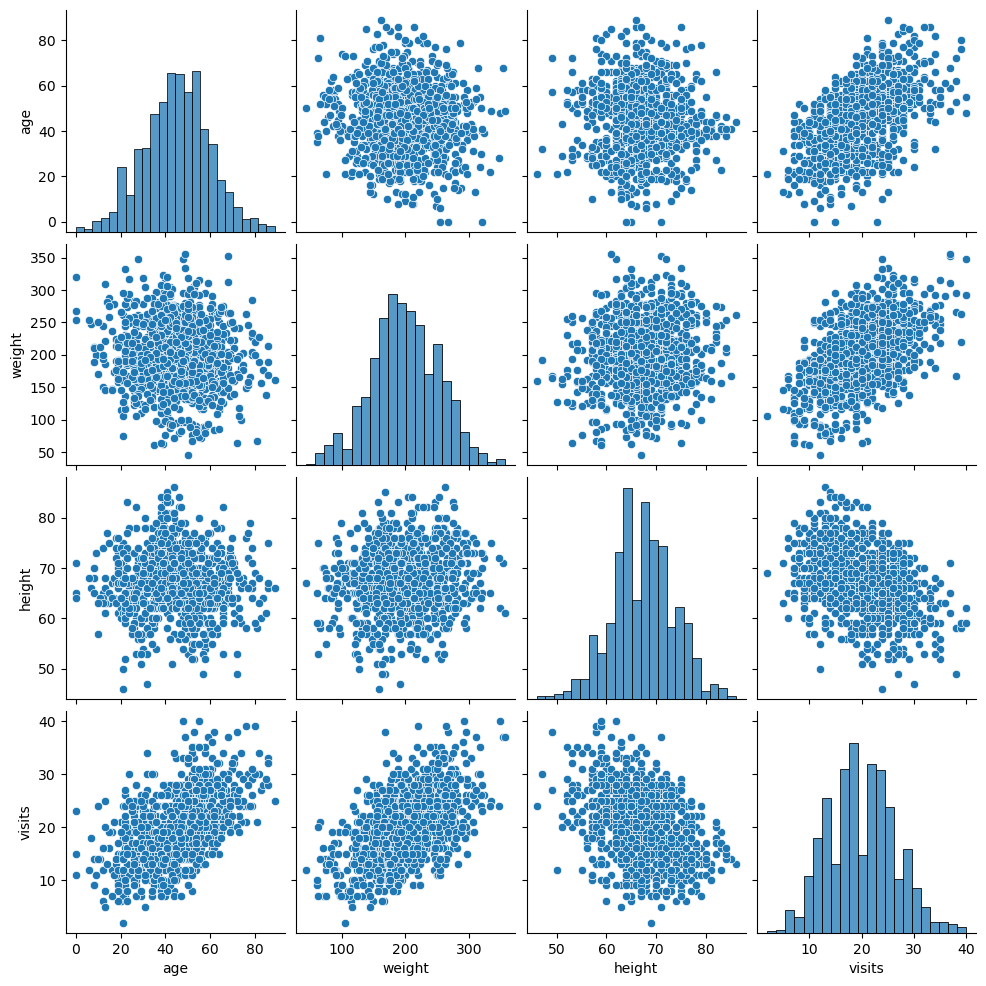

In [62]:
sns.pairplot(df)

## **Veri Düzenleme**

In [63]:
df.rename(columns={
    "age" : "yas",
    "gender" : "cinsiyet",
    "race/ethnicity":"irk",
    "weight": "kilo",
    "height" : "boy"
},inplace=True

)

In [64]:
df["kilo"] = round(df["kilo"]*0.45)

In [65]:
df["boy"] = round(df["boy"]*2.54)

In [ ]:
df["cinsiyet"].replace({
    "female" : 0,
    "male" : 1

},inplace=True)

In [ ]:
df["irk"] = df["irk"].replace({
    "group A" :1 ,
    "group B" :2 ,
    "group C" :3 ,
    "group D" :4 ,
    "group E" :5 ,

})

## **Train Test Split**

In [68]:
X = df.drop("visits",axis=1)
y = df["visits"]

In [69]:
from sklearn.model_selection import train_test_split

In [70]:
X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.3, random_state=99)

## **Linear Regresyon**

In [71]:
from sklearn.linear_model import LinearRegression

In [72]:
regr = LinearRegression()

In [73]:
regr.fit(X_train,y_train)

LinearRegression()

In [74]:
test_preds = regr.predict(X_test)
test_preds

array([25.47287336, 16.34545747, 15.96774389, 12.55665556, 28.94801448,
       12.35876421, 18.3300025 , 12.88470601, 25.88269661, 16.54034389,
       14.575362  , 17.39199018, 16.87788289, 17.10361996, 28.67505763,
       12.49395624, 17.32279133, 22.80152606, 24.63576961, 11.28157707,
       10.92664001, 30.68800454, 20.43021187, 17.19895224, 23.04190113,
       23.04579988, 22.17555941, 15.07798902, 30.69408062, 14.93853304,
       18.35996377, 27.89919367, 22.79782893, 28.79354921, 27.20269343,
       13.06444182, 18.2764939 , 20.97413184, 10.59746303, 24.24034679,
       19.40191897, 18.56565253, 24.97283579, 21.1238621 , 13.43515292,
       16.34325795, 25.28669123,  8.75706466, 19.84670346, 25.91882601,
       20.75334454, 24.20812058, 23.26085752, 16.73120977,  7.90752518,
       17.95969006, 13.76233617, 17.40203474, 29.32279488, 20.62019387,
       21.52168162, 19.1231761 , 13.45239364, 25.22222198, 18.20434586,
       13.91206643, 19.56291105, 14.16214579, 16.11663239, 35.20

In [75]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [76]:
print("Theta :     ", np.round(regr.coef_[0], 2))  
print("Intercept : ", np.round(regr.intercept_, 2))  
print("R^2 :       ", round(r2_score(y_test, test_preds), 2)) 
print("MAE :       ", round(mean_absolute_error(y_test, test_preds), 2))
print("RMSE :      ", round(np.sqrt(mean_squared_error(y_test, test_preds)), 2))

Theta :      0.25
Intercept :  22.82
R^2 :        0.84
MAE :        2.24
RMSE :       2.64


In [77]:
df["visits"].mean() , df["visits"].std()

(19.956, 6.455054742737022)

## **Final**

In [78]:
final = LinearRegression()
final.fit(X,y)

LinearRegression()

In [79]:
y_hat = final.predict(X)

In [80]:
final.coef_

array([ 0.24632879,  0.09839742,  0.01495996,  0.17715817, -0.18001305])

In [81]:
coef_df = pd.DataFrame(final.coef_, X.columns, columns=["Katsayı"])
coef_df

,Katsayı
yas,0.246329
cinsiyet,0.098397
irk,0.014960
kilo,0.177158
boy,-0.180013


In [82]:
print(df["yas"].mean())
print(df["cinsiyet"].mean())
print(df["irk"].mean())
print(df["kilo"].mean())
print(df["boy"].mean())

45.019
0.481
3.155
89.574
170.914


In [83]:
insan_evladi = [[30,0,1,60,164]]
insan_evladi

[[30, 0, 1, 60, 164]]

In [ ]:
final.predict(insan_evladi)

##### **Sonuç : 12.18215443**

## **Residual**

In [85]:
residual = y_hat - y
residual

0     -2.730322
1     -0.525298
2      1.004824
3     -1.926409
4     -1.626366
         ...   
995    2.985116
996    1.027038
997    0.601320
998   -2.861221
999    3.407172
Name: visits, Length: 1000, dtype: float64

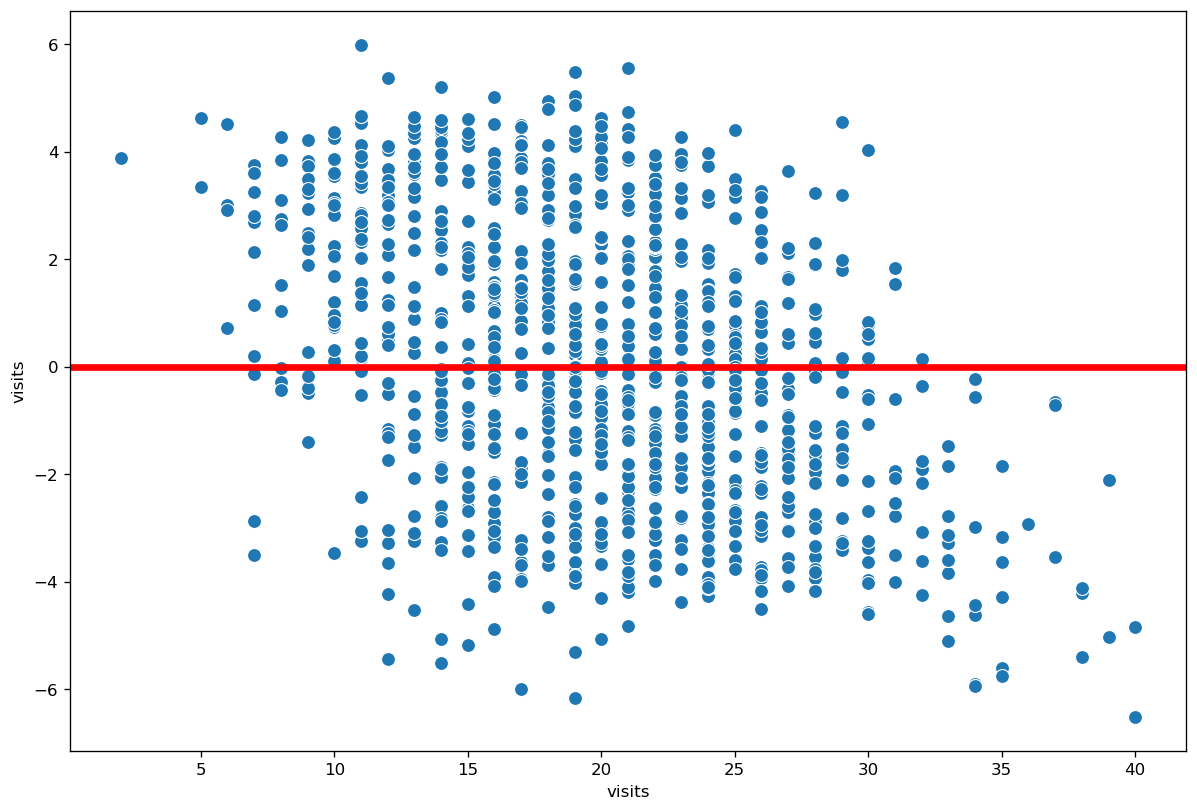

In [86]:
plt.figure(figsize=(12,8), dpi=120)
sns.scatterplot(x=y, y= residual,s=70)
plt.axhline(y=0,color="red",lw=4)

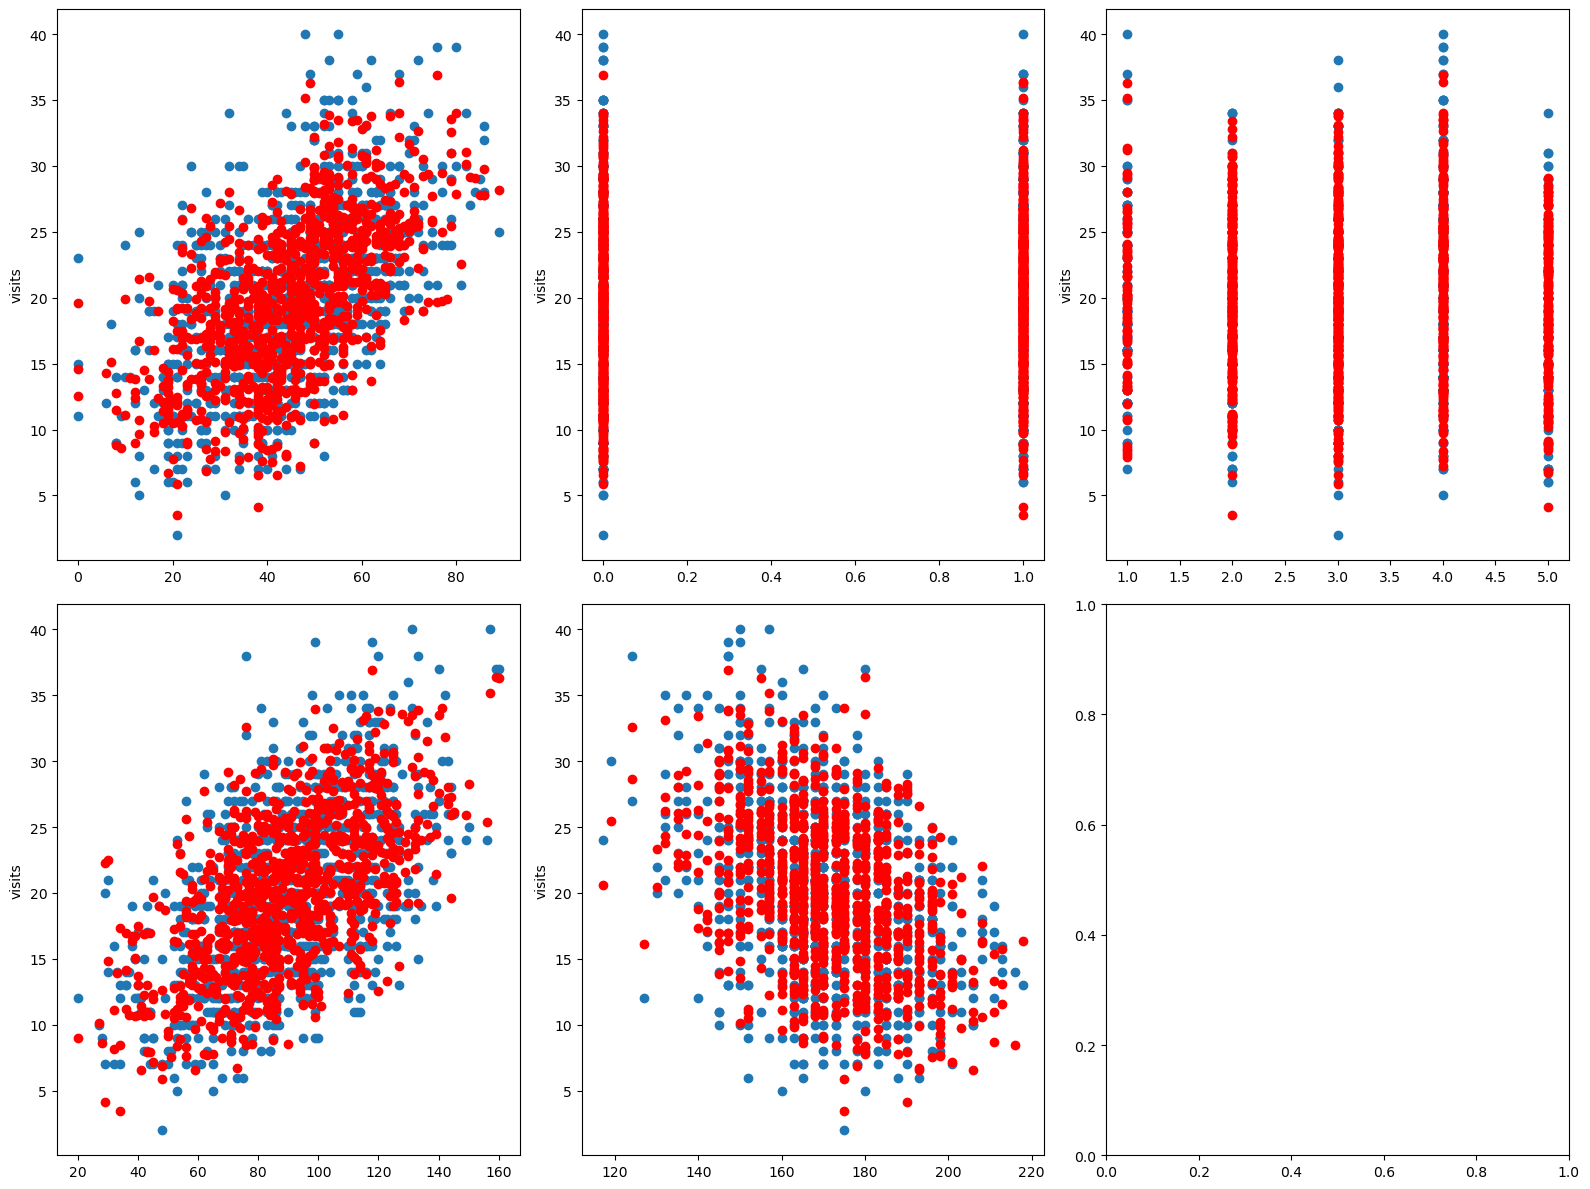

In [87]:
fig,axes = plt.subplots(nrows=2,ncols=3,figsize=(16,12))

axes[0,0].plot(df['yas'],df['visits'],'o')
axes[0,0].plot(df['yas'],y_hat,'o',color='red')
axes[0,0].set_ylabel("visits")

axes[0,1].plot(df['cinsiyet'],df['visits'],'o')
axes[0,1].plot(df['cinsiyet'],y_hat,'o',color='red')
axes[0,1].set_ylabel("visits")

axes[0,2].plot(df['irk'],df['visits'],'o')
axes[0,2].plot(df['irk'],y_hat,'o',color='red')
axes[0,2].set_ylabel("visits")

axes[1,0].plot(df['kilo'],df['visits'],'o')
axes[1,0].plot(df['kilo'],y_hat,'o',color='red')
axes[1,0].set_ylabel("visits")

axes[1,1].plot(df['boy'],df['visits'],'o')
axes[1,1].plot(df['boy'],y_hat,'o',color='red')
axes[1,1].set_ylabel("visits")

plt.tight_layout();